# 📘 Life Expectancy Analysis

# 📖 1. Introduction
"""
This notebook explores the Life Expectancy dataset published by the World Health Organization (WHO).
We will perform data cleaning, visualization, and build a machine learning model to predict life expectancy
based on health, economic, and social indicators across countries.
"""

📥 2. Load & Preview Data
We begin by importing the dataset and taking a first look at the rows, columns, and structure of the data. This helps us understand what features are available and how we can proceed with cleaning and analysis.

In [14]:
import pandas as pd

df = pd.read_csv("Life Expectancy Data.csv")
print(df.shape)
df.head()


(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


🧹 3. Data Cleaning
Before analysis, it's essential to handle missing values and check data types. In this step, we inspect null values, drop or impute them, and ensure that numerical and categorical data are ready for processing.

In [15]:
df.info()
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
 HIV/AIDS                            0
Country                              0
Year                                 0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
under-five deaths                    0
dtype: int64

In [16]:
# Drop rows with missing values (or fill them depending on strategy)
df = df.dropna()
# Alternative: df.fillna(method='ffill') or df.fillna(df.mean())


🔎 4. Exploratory Data Analysis (EDA)
We explore the distribution of life expectancy across the dataset. This includes using histograms and statistical summaries to identify patterns, skewness, and potential outliers.

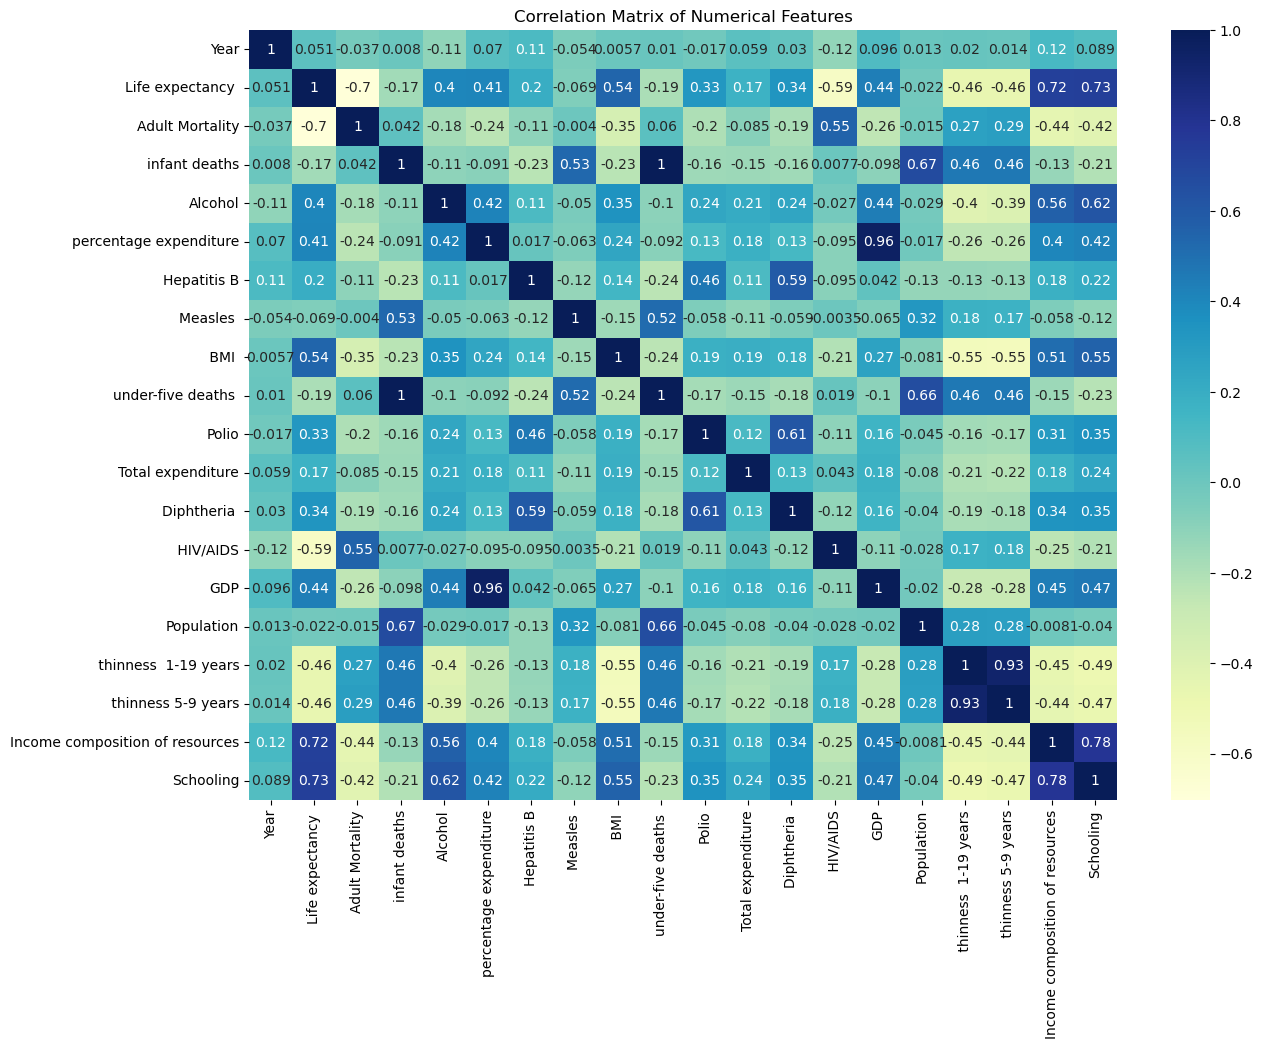

In [17]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix of Numerical Features")
plt.show()


## 📊 Correlation Matrix Analysis

The correlation matrix shown above visualizes the pairwise correlation between numerical features in the Life Expectancy dataset. This is an important step in Exploratory Data Analysis (EDA), helping us identify which features are strongly related to the target variable `Life expectancy`.

### 🧠 What is a Correlation Matrix?

- A correlation matrix displays the **correlation coefficients** between variables.
- Each value ranges from **-1 to 1**:
  - `+1` = strong positive relationship
  - `0` = no relationship
  - `-1` = strong negative relationship
- It helps detect **multicollinearity**, **key predictors**, and **irrelevant features**.

---

### 🔍 Key Observations

| Feature Pair                         | Correlation | Interpretation                                                           |
|-------------------------------------|-------------|---------------------------------------------------------------------------|
| `Life expectancy` & `Schooling`     | **0.73**    | Strong positive correlation – higher education tends to increase life expectancy. |
| `Life expectancy` & `Income comp.`  | **0.72**    | Strong positive – more access to resources tends to improve life quality. |
| `Life expectancy` & `Adult Mortality` | **-0.70** | Strong negative – higher adult mortality rates lower life expectancy.     |
| `Life expectancy` & `HIV/AIDS`      | **-0.56**   | Negative correlation – HIV/AIDS prevalence reduces life expectancy.      |
| `Life expectancy` & `BMI`           | **0.55**    | Moderate positive correlation – nutritional health may affect longevity. |
| `Life expectancy` & `GDP`           | **0.46**    | Moderate – wealthier countries may have better healthcare.                |

---

### 🎨 Color Interpretation in Heatmap

- **Dark blue** = High positive correlation
- **Light yellow/green** = Low or negative correlation
- **White / neutral** = Near zero correlation

This color scale helps in quickly identifying the most impactful relationships.

---

### ✅ Why This Matters

Understanding these relationships:
- Helps us choose the **most relevant features** for our model
- Avoids **overfitting** from including redundant or weak predictors
- Guides **feature engineering** or **dimensionality reduction** (e.g., PCA)

---

### 📌 Next Step Suggestions

- Drop or transform features with very low or redundant correlation
- Use high-correlation variables for model training
- Consider outlier handling if correlations are unexpectedly weak

---

📁 *This file is part of the Life Expectancy Prediction Project (EDA Phase).*


📊 5. Correlation Heatmap
We calculate the correlation between features to determine which variables are most strongly associated with life expectancy. This is visualized using a heatmap to easily identify key influencing factors.

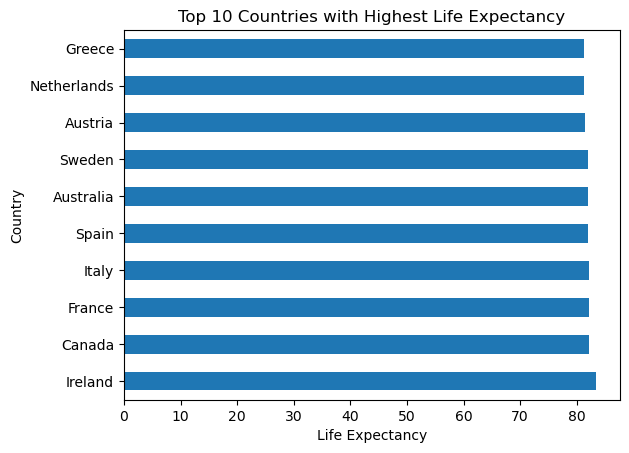

In [18]:
top_countries = df.groupby("Country")["Life expectancy "].mean().sort_values(ascending=False).head(10)
top_countries.plot(kind='barh', title='Top 10 Countries with Highest Life Expectancy')
plt.xlabel("Life Expectancy")
plt.show()


## 🌍 Top 10 Countries with Highest Life Expectancy

This horizontal bar chart shows the 10 countries where people live the longest based on the dataset.

### 📊 Interpretation

- **Each bar** represents a country.
- The **length of the bar** indicates the **life expectancy** value.
- All countries listed (like **Greece**, **Netherlands**, **Ireland**) have **life expectancies around 82–83 years**, suggesting strong healthcare systems, good education, high income, and healthy lifestyles.

### 🧠 Why It Matters

Understanding which countries lead in life expectancy helps us:
- Benchmark health and social policies
- Analyze which features (e.g. GDP, schooling, healthcare expenditure) contribute most to longevity
- Build predictive models with meaningful patterns

### 📌 Next Step Suggestions

- Compare these with countries having the **lowest life expectancy**
- Investigate what **key features** differ
- Use as input for a **classification or clustering model** in future work

---

📁 *This chart is part of the Life Expectancy EDA - Country Level Insights.*


📉 1. Scatter Plot — Actual vs Predicted

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = df.drop(["Life expectancy ", "Country"], axis=1).select_dtypes(include='number')
y = df["Life expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 1.116421212121216


📉 1. Scatter Plot — Actual vs Predicted visualisaion

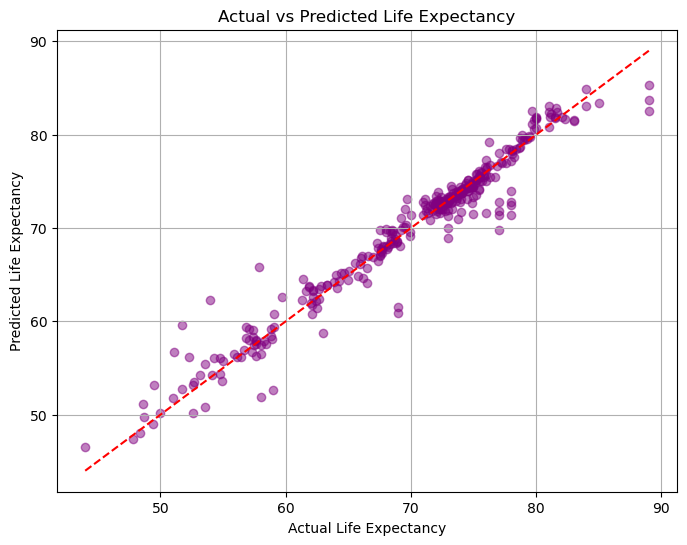

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis identitas
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.grid(True)
plt.show()


## 🔍 Actual vs Predicted Life Expectancy

This scatter plot compares the actual life expectancy values from the dataset with the predicted values from the regression model.

### 📊 Interpretation

- Each **dot** represents a data point (a country/year).
- The **x-axis** shows the **actual life expectancy**, while the **y-axis** shows the **predicted life expectancy**.
- The **red dashed line** is the line of perfect prediction (𝑦 = 𝑥). If all dots fall exactly on this line, it means the model predicted perfectly.

### ✅ What We Can See

- Most points are **clustered around the red line**, which means the model made **reasonably accurate predictions**.
- Some outliers show where the model **underestimated or overestimated**.
- This visualization helps to evaluate the **performance of the regression model** visually.

### 📌 Why It’s Useful

- It visually validates model accuracy.
- Helps identify patterns of **systematic error**.
- Can guide **model improvements or feature engineering**.

---

🧠 *This plot supports the conclusion that the regression model is effective in predicting life expectancy, with some room for improvement.*


📊 2. Histogram — Distribution of Errors

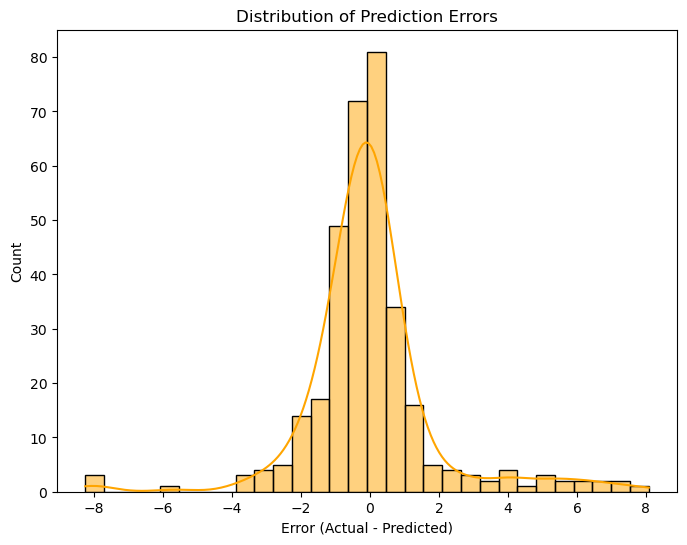

In [28]:
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True, color='orange')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.show()


## 📉 Distribution of Prediction Errors

This histogram shows the distribution of the differences between the actual and predicted values of life expectancy (i.e., the prediction errors).

### 📊 Interpretation

- The **x-axis** shows the error values (Actual - Predicted).
- The **y-axis** shows the **frequency** of each error range.
- The **orange line** represents a **normal distribution curve (KDE)**, helping visualize how closely the errors follow a bell-shaped curve.

### ✅ What We Can See

- The errors are **centered around 0**, meaning the model doesn't consistently overestimate or underestimate.
- The **majority of errors are between -2 and 2**, indicating good predictive accuracy.
- Some **outliers** exist (errors beyond ±5), but they are relatively rare.

### 📌 Why It’s Useful

- A roughly **symmetrical and bell-shaped** distribution suggests that the model errors are **normally distributed**, which is ideal for linear regression.
- It helps detect **bias**: If the peak shifts left/right, it might indicate systematic under- or over-prediction.
- It shows **variance** in prediction quality across data points.

---

🧠 *This plot suggests the model is well-calibrated, with most predictions close to the actual values and error distributed normally.*


🧠 Explain Markdown for grafik evaluation:
In order to visually evaluate model performance, we plot actual vs. predicted life expectancy. A perfect model would align all points on the diagonal line. We also analyze the distribution of prediction errors to check for bias or skew.